# Classical Approach

List of numbers: [19, 1, 24, 12, 8, 13, 16, 5]
Target Number: 13
Mode: 19


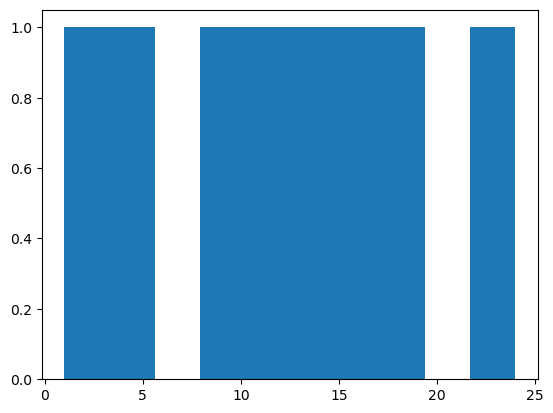

In [6]:
# Define target element and string 
import random
import statistics
import matplotlib.pyplot as plt

len_list = 8
list_of_numbers = random.sample(range(0, 25), len_list)
random.shuffle(list_of_numbers)
target_idx = random.randint(0, len_list-1)
target = list_of_numbers[target_idx]

print(f"List of numbers: {list_of_numbers}")
print(f"Target Number: {target}")

mode = statistics.mode(list_of_numbers)
print("Mode:", mode)

plt.hist(list_of_numbers)
plt.show()

Target element found at position 5 within the list
number of searches required was 6


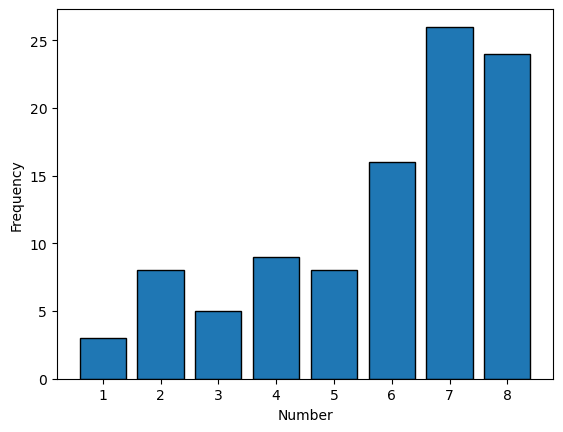

In [7]:
def classical_search(target, data_str):

    num_of_searches = 0
    for idx, elem in enumerate(data_str):
        num_of_searches += 1
        if elem == target:
            print(f'Target element found at position {idx} within the list')
            break

    
    print(f'number of searches required was {num_of_searches}')

classical_search(target, list_of_numbers)

lst = [8, 8, 6, 3, 8, 1, 4, 7, 3, 2, 8, 7, 5, 8, 6, 6, 5, 3, 7, 7, 8, 2, 6, 7, 6, 8, 1, 4, 7, 7, 8, 7, 7, 8, 2, 3, 7, 8, 8, 6, 5, 6, 8, 6, 7, 5, 7, 6, 6, 4, 3, 6, 2, 4, 5, 8, 8, 7, 7, 7, 8, 7, 4, 6, 2, 4, 8, 4, 8, 8, 7, 8, 8, 5, 2, 8, 5, 7, 6, 1, 2, 6, 8, 7, 7, 4, 5, 7, 8, 8, 6, 6, 7, 7, 2, 4, 7, 7, 7]

# Create a dictionary to store frequency counts
frequency_counts = {i: lst.count(i) for i in range(1, 9)}

# Create bar chart
plt.bar(frequency_counts.keys(), frequency_counts.values(), edgecolor='black')
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.xticks(range(1, 9))  
plt.show()



# Quantum Approach

This code implements grover's algorithm to find a target element from a list of integers. 

In essence the algorithm works in the following steps:

* Initialise the register of qubits to the superposition state. 
* Apply the oracle -  this flips the phase of the target state.
* Apply the diffuser - this amplifies the amplitude of the target state and reduces the amplitude of all other states
* Repeat steps 2 and 3 a defined number of times
* Measure the register to obtain the solution with high probability.


In [8]:
import math
import random
from math import pi as PI
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

Number of qubits is 5
List of numbers: [7, 12, 10, 0, 2, 8, 3, 22]
Target Number: 10 and in binary is 01010
List of binary strings: ['00111', '01100', '01010', '00000', '00010', '01000', '00011', '10110']

Most probable outcome (from Grover's Algorithm): 01010
Completed with 1 iteration


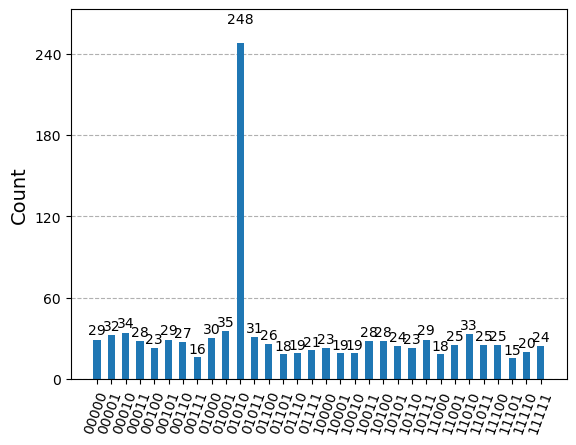

In [9]:
# Function to convert an integer to a binary string
def int_to_binstring(x, n):
    return format(x, 'b').zfill(n)

# Oracle for the target element search
def find_target_element_oracle(num_qubits, target):
    target_binary = format(target, 'b').zfill(num_qubits)

    oracle = QuantumCircuit(num_qubits + 1)

    for i in range(num_qubits):
        if target_binary[i] == '0':
            oracle.x(i)

    oracle.mcx(list(range(num_qubits)), num_qubits)

    for i in range(num_qubits):
        if target_binary[i] == '0':
            oracle.x(i)

    return oracle

# Diffusion operator
def diffusion_operator(num_qubits):
    diffusion = QuantumCircuit(num_qubits)

    # Apply Hadamard gate to all qubits
    diffusion.h(range(num_qubits))

    # Apply X gate
    diffusion.x(range(num_qubits))

    # Apply multi-controlled X gate
    diffusion.h(num_qubits - 1)
    diffusion.mcx(list(range(num_qubits - 1)), num_qubits - 1)
    diffusion.h(num_qubits - 1)

    # Apply X gate again
    diffusion.x(range(num_qubits))
    diffusion.h(range(num_qubits))

    return diffusion

# Grover's Algorithm
def grover_algorithm(oracle, diffusion, num_qubits, num_of_iterations):
    grover = QuantumCircuit(num_qubits + 1, num_qubits)

    # Apply Hadamard gate
    grover.h(range(num_qubits))
    grover.x(num_qubits)
    grover.h(num_qubits)

    # Grover iterations
    for i in range(num_of_iterations):
        grover.append(oracle, range(num_qubits + 1))
        grover.append(diffusion, range(num_qubits))

    grover.measure(range(num_qubits), range(num_qubits))

    return grover

# Define Inputs
len_list = 8
list_of_numbers = random.sample(range(0, 25), len_list)
random.shuffle(list_of_numbers)
target_idx = random.randint(0, len_list - 1)
target = list_of_numbers[target_idx]

target_binary = format(target, 'b').zfill(5)
num_qubits = math.ceil(math.log2(max(list_of_numbers) + 1))

print(f'Number of qubits is {num_qubits}')
print(f"List of numbers: {list_of_numbers}")
print(f"Target Number: {target} and in binary is {target_binary}")

# Convert integers in the list to binary strings
list_of_binstrings = [format(num, 'b').zfill(num_qubits) for num in list_of_numbers]

print(f"List of binary strings: {list_of_binstrings}")

# Create the oracle and the diffusion operator
oracle = find_target_element_oracle(num_qubits, target)
diffusion = diffusion_operator(num_qubits)

# Compute the optimal number of iterations
num_of_iterations = math.floor((math.pi / 4) * math.sqrt(2 ** num_qubits / len(list_of_numbers)))

# Create the quantum circuit for Grover's algorithm
grover = grover_algorithm(oracle, diffusion, num_qubits, num_of_iterations)

# Run Simulation
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(grover, backend)
job = backend.run(transpiled_circuit)
result = job.result()
counts = result.get_counts()

# Determine the most probable outcome
target_outcome = max(counts, key=counts.get)
print(f"\nMost probable outcome (from Grover's Algorithm): {target_outcome}")
print(f"Completed with {num_of_iterations} iteration")

# Plot Histogram
plot_histogram(counts)
